# Pandas repetition


## 0.Working with national test data

### **a)** Start with reading in the file riket2023_åk9_np.xlsx and the sheets for the different subjects.

In [179]:
#läser in från excel i datamappen
import pandas as pd

# Define the file path to the Excel file containing the data.
# This is the file that will be processed later in the code.
national_test_file_path = "data/riket2023_åk9_np.xlsx"

# Read the Excel file to get a list of all sheet names in the file.
# `pd.ExcelFile()` creates an object that allows you to interact with the Excel file.
# `.sheet_names` extracts the names of all the sheets in the file as a list.
sheet_names = pd.ExcelFile(national_test_file_path).sheet_names


# Initialize an empty dictionary to store dataframes.
df_dict = {}

# Loop through all the sheet names in the variable `sheet_names` except the last one.
for sheet_name in sheet_names[:-1]:
    # For each sheet name, read the corresponding Excel sheet from the file.
    # `national_test_file_path` is the path to the Excel file.
    # `skiprows=8` tells pandas to skip the first 8 rows of the sheet (possibly to skip headers or metadata).
    # `sheet_name=sheet_name` specifies which sheet in the Excel file to read.
    df_dict[sheet_name] = pd.read_excel(
        national_test_file_path, skiprows=8, sheet_name=sheet_name
    )

# Get and display the keys (sheet names) in the dictionary `df_dict`.
# This confirms that the dataframes were successfully added to the dictionary.
df_dict.keys()


dict_keys(['Engelska', 'Matematik', 'Svenska', 'Svenska som andraspråk'])

In [180]:
df_dict["Matematik"]

,Riket,Typ av huvudman,Totalt,Flickor,Pojkar,Totalt,Flickor,Pojkar,Totalt,Flickor,Pojkar
0,Riket,Samtliga,106766,51548,55218,89.1,88.7,89.5,11.9,11.8,12.0
1,Riket,Kommunal,84163,40386,43777,88.1,87.7,88.5,11.6,11.5,11.7
2,Riket,Enskild,22553,11137,11416,92.9,92.2,93.5,13.0,12.8,13.1
3,Riket,Skolverket,50,25,25,~100,~100,~100,14.1,13.5,14.7


In [181]:
# Create a list of all the keys (sheet names/excel sheet) from the dictionary `df_dict`.
# `df_dict.keys()` returns a view of the dictionary's keys, which are the sheet names.
# `list()` converts this view into a standard Python list.
subjects = list(df_dict.keys())
subjects

['Engelska', 'Matematik', 'Svenska', 'Svenska som andraspråk']

 ### **b)** change name of columns

In [182]:
#visar alla columner i sheet Engelska 
df_dict["Engelska"].columns

Index(['Riket', 'Typ av huvudman', 'Totalt', 'Flickor', 'Pojkar', 'Totalt ',
       'Flickor ', 'Pojkar ', 'Totalt  ', 'Flickor  ', 'Pojkar  '],
      dtype='object')

In [183]:
import numpy as np

postfixes = [""]*2 + [" (A-F)"]*3 + [(" poäng")]*3 + [(" A-E")]*3
np.array(postfixes)

array(['', '', ' (A-F)', ' (A-F)', ' (A-F)', ' poäng', ' poäng', ' poäng',
       ' A-E', ' A-E', ' A-E'], dtype='<U6')

In [184]:
#concatinera listorna postfixes och df_dict 
np.array(postfixes) + df_dict["Engelska"].columns

Index(['Riket', 'Typ av huvudman', ' (A-F)Totalt', ' (A-F)Flickor',
       ' (A-F)Pojkar', ' poängTotalt ', ' poängFlickor ', ' poängPojkar ',
       ' A-ETotalt  ', ' A-EFlickor  ', ' A-EPojkar  '],
      dtype='object')

In [185]:
#outputen efter övre input visar oordning, extra mellanslag etc, 
# därför vill vi finslipa med hjälp av strip etc
df_dict["Engelska"].columns.str.strip() + np.array(postfixes)

Index(['Riket', 'Typ av huvudman', 'Totalt (A-F)', 'Flickor (A-F)',
       'Pojkar (A-F)', 'Totalt poäng', 'Flickor poäng', 'Pojkar poäng',
       'Totalt A-E', 'Flickor A-E', 'Pojkar A-E'],
      dtype='object')

**NEW column names**

In [186]:
from copy import deepcopy #copy har fortfarande referenser kvar från minnesadressen. Deepcopy är en helt ny minnesadress

#behöver skapa en deep kopia av det förra dict eftersom de ändrade titlarna staplas varje gång programmet körs
df_dict_cleaned = deepcopy(df_dict)

for subject in subjects:
    new_columns = df_dict_cleaned[subject].columns.str.strip() + np.array(postfixes)
    
    df_dict_cleaned[subject].columns = new_columns
    df_dict_cleaned[subject] = df_dict_cleaned[subject].rename( # Rename the columns of the DataFrame for a specific subject
        {"Riket": "Plats", "Typ av huvudman": "Huvudman"}, axis=1 # Rename "Riket: " to "Nation"//axis=1 means columns, axis=0 means rows
        )

df_dict_cleaned["Matematik"]

,Plats,Huvudman,Totalt (A-F),Flickor (A-F),Pojkar (A-F),Totalt poäng,Flickor poäng,Pojkar poäng,Totalt A-E,Flickor A-E,Pojkar A-E
0,Riket,Samtliga,106766,51548,55218,89.1,88.7,89.5,11.9,11.8,12.0
1,Riket,Kommunal,84163,40386,43777,88.1,87.7,88.5,11.6,11.5,11.7
2,Riket,Enskild,22553,11137,11416,92.9,92.2,93.5,13.0,12.8,13.1
3,Riket,Skolverket,50,25,25,~100,~100,~100,14.1,13.5,14.7


### **c)** EDA (Exploratory Data Analysis)
Do some initial exploratory data analysis on this dataset. Use methods such as info, value_counts, columns, describe and some more to get a first insight into the dataset.

In [187]:
df_dict_cleaned["Matematik"].info()
#object is a datatype that can be any kind of data - its very flexible
# it can hold numbers, strings, lists, dictionaries, etc

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Plats          4 non-null      object 
 1   Huvudman       4 non-null      object 
 2   Totalt (A-F)   4 non-null      int64  
 3   Flickor (A-F)  4 non-null      int64  
 4   Pojkar (A-F)   4 non-null      int64  
 5   Totalt poäng   4 non-null      object 
 6   Flickor poäng  4 non-null      object 
 7   Pojkar poäng   4 non-null      object 
 8   Totalt A-E     4 non-null      float64
 9   Flickor A-E    4 non-null      float64
 10  Pojkar A-E     4 non-null      float64
dtypes: float64(3), int64(3), object(5)
memory usage: 484.0+ bytes


In [188]:
df_dict_cleaned["Matematik"]["Totalt (A-F)"]

0    106766
1     84163
2     22553
3        50
Name: Totalt (A-F), dtype: int64

**Kolla statestik med describe() & transpose()**

In [199]:
df_dict_cleaned["Matematik"].describe().transpose()


,count,mean,std,min,25%,50%,75%,max
Totalt (A-F),4.0,53383.000,50305.900509,50.0,16927.250,53358.00,89813.750,106766.0
Flickor (A-F),4.0,25774.000,24187.203159,25.0,8359.000,25761.50,43176.500,51548.0
Pojkar (A-F),4.0,27609.000,26119.924770,25.0,8568.250,27596.50,46637.250,55218.0
Totalt A-E,4.0,12.650,1.138713,11.6,11.825,12.45,13.275,14.1
Flickor A-E,4.0,12.400,0.920145,11.5,11.725,12.30,12.975,13.5
Pojkar A-E,4.0,12.875,1.357387,11.7,11.925,12.55,13.500,14.7


In [196]:
df_dict_cleaned["Matematik"].columns #visar namn på columner 
df_dict_cleaned["Matematik"][["Huvudman", "Totalt poäng"]] #går in i sheet matematik och visar columner _ och _


,Huvudman,Totalt poäng
0,Samtliga,89.1
1,Kommunal,88.1
2,Enskild,92.9
3,Skolverket,~100


### d) amount of students that got F in math

**DuckDB**

In [ ]:
# Totalt (A-F) - All students in Huvudman
# Totalt (A-E) - All students that have passed

#Pick Huvudman Samtliga
df_math = df_dict_cleaned["Matematik"]
df_math

In [228]:
import duckdb

total_students = duckdb.query(
    """
    SELECT "Totalt (A-F)"
    FROM df_math
    WHERE huvudman = 'Samtliga'
"""
).df().values[0][0]

total_students

np.int64(106766)

**Pandas**

In [226]:
df_math.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Plats          4 non-null      object 
 1   Huvudman       4 non-null      object 
 2   Totalt (A-F)   4 non-null      int64  
 3   Flickor (A-F)  4 non-null      int64  
 4   Pojkar (A-F)   4 non-null      int64  
 5   Totalt poäng   4 non-null      object 
 6   Flickor poäng  4 non-null      object 
 7   Pojkar poäng   4 non-null      object 
 8   Totalt A-E     4 non-null      float64
 9   Flickor A-E    4 non-null      float64
 10  Pojkar A-E     4 non-null      float64
dtypes: float64(3), int64(3), object(5)
memory usage: 484.0+ bytes


In [ ]:
students_passed = df_math.query("Huvudman == 'Samtliga'")["Totalt (A-E)"]*.01*total_students
students_passed

### e) bar chart on total points for each subject

In [249]:
#matplotlib // barplotting // x = keys, height = points
total_points = {}

df_dict_cleaned["Engelska"].query("Huvudman == 'Samtliga'")["Totalt poäng"][0]


np.float64(97.0)

In [ ]:
for subject in subjects:
    total_points[subject] = df_dict_cleaned[subject].query("Huvudman == 'Samtliga'")[
        "Totalt poäng"][0]

total_points

: 

['Engelska', 'Matematik', 'Svenska', 'SvA']


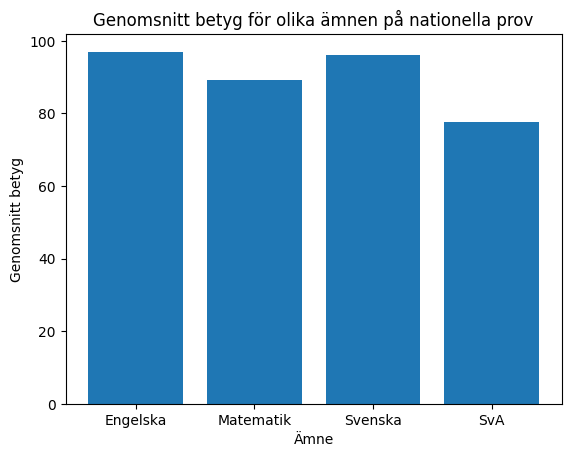

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1)

ax.bar(x = total_points.keys(), height=total_points.values())
ax.set(
    xlabel="Ämne", 
    ylabel="Genomsnitt betyg", 
    title="Genomsnitt poäng för olika ämnen på nationella prov"
)

subjects[-1] = "SvA"
print(subjects)
ax.set_xticks(labels=subjects, ticks=range(len(subjects)));